# **Llibreries**
Importem les llibreries que voldrem utilitzar en el projecte.

In [487]:
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
from matplotlib import pyplot as plt

In [488]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split



# **Dades**
Llegim el csv amb totes les dades disponibles i les mostrem per pantalla

In [489]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv("student-mat.csv")

In [490]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


Podem veure totes les variables. <br>Podem trobar més informació com quantes columnes i files tenim. (Podemos explicar todas las variables aquí).


In [491]:
data.shape

(395, 33)

Tenim 395 files i 33 columnes. <br>
Més info


In [492]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


Ara volem saber si d'aquestes columnes hi alguna amb molt valors NULLS per poder treure-la.

In [493]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

No hi ha cap columna amb NULLS per tant ara volem definir quines d'aquestes variables serán útils per al nostre objectiu. (Eliminem les variables que no volem)


In [494]:
data = data.drop(['school', 'famsize', 'Pstatus', 'Fedu', 'Medu', 'Fjob', 'Mjob', 'reason', 'guardian', 'traveltime', 'famsup', 'nursery',  'internet', 'goout', 'Dalc'], axis = 1)

In [495]:
data.shape

(395, 18)

# **Data Transformation**



In [496]:


# for yes / no values:
d = {'yes': 1, 'no': 0}
data['schoolsup'] = data['schoolsup'].map(d)

In [497]:
d = {'F': 1, 'M': 0}
data['sex'] = data['sex'].map(d)


In [498]:


data.nunique()




sex            2
age            8
address        2
studytime      4
failures       4
schoolsup      2
paid           2
activities     2
higher         2
romantic       2
famrel         5
freetime       5
Walc           5
health         5
absences      34
G1            17
G2            17
G3            18
dtype: int64

In [499]:
data.head()

,sex,age,address,studytime,failures,schoolsup,paid,activities,higher,romantic,famrel,freetime,Walc,health,absences,G1,G2,G3
0,1,18,U,2,0,1,no,no,yes,no,4,3,1,3,6,5,6,6
1,1,17,U,2,0,0,no,no,yes,no,5,3,1,3,4,5,5,6
2,1,15,U,2,3,1,yes,no,yes,no,4,3,3,3,10,7,8,10
3,1,15,U,3,0,0,yes,yes,yes,yes,3,2,1,5,2,15,14,15
4,1,16,U,2,0,0,yes,no,yes,no,4,3,2,5,4,6,10,10


# **Taking all data x and y**

In [500]:

def bar_plot(variable):
    var = data[variable]
    var_c = var.value_counts()

    plt.figure(figsize= (5,5))
    plt.bar(var_c.index, var_c)
    plt.ylabel('Frequency')
    plt.show()
    print("{}\n{}".format(variable, var_c))


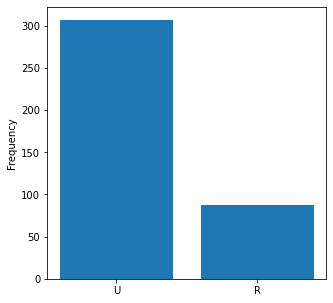

address
U    307
R     88
Name: address, dtype: int64
paid
no     214
yes    181
Name: paid, dtype: int64
activities
yes    201
no     194
Name: activities, dtype: int64
higher
yes    375
no      20
Name: higher, dtype: int64
romantic
no     263
yes    132
Name: romantic, dtype: int64


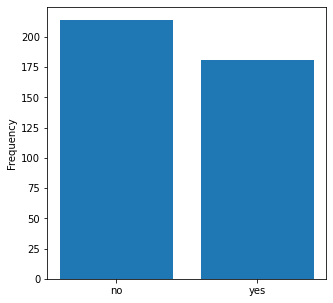

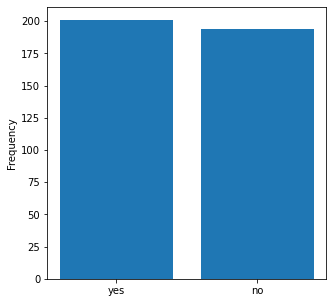

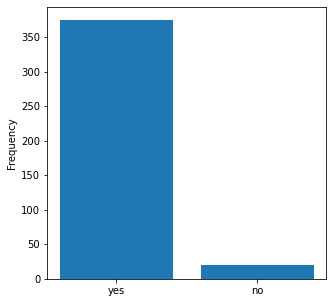

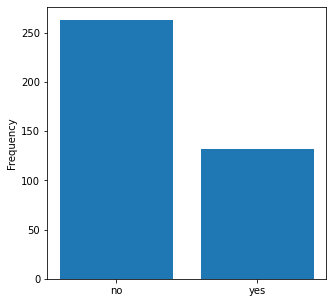

In [501]:


categorical = data.dtypes=='object'
categorical_list = list(categorical[categorical].index)
categorical_list

for i in categorical_list:
    bar_plot(i)



In [502]:
import numpy as np
from sklearn.metrics import mean_squared_error

def mse(v1, v2):
    return ((v1 - v2)**2).mean()



In [503]:
from sklearn.linear_model import LinearRegression
def regression(x, y):
    # Creem un objecte de regressió de sklearn

    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr



In [504]:
#transform data
#Urban sera 0
#Rural sera 1
print(data)
data['address'] = data['address'].replace(['U'],0)
data['address'] = data['address'].replace(['R'],1)
#No --> 0
#Yes -->1
data['paid'] = data['paid'].replace(['no'],0)
data['paid'] = data['paid'].replace(['yes'],1)
data['activities'] = data['activities'].replace(['no'],0)
data['activities'] = data['activities'].replace(['yes'],1)
data['romantic'] = data['romantic'].replace(['no'],0)
data['romantic'] = data['romantic'].replace(['yes'],1)
data['higher'] = data['higher'].replace(['no'],0)
data['higher'] = data['higher'].replace(['yes'],1)
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

#Normalization
min_max = MinMaxScaler()
dataNormalize = min_max.fit_transform(data)


#converting dataNormalize to x and y to pandas

df = pd.DataFrame(dataNormalize, columns=['sex','age','address',  'studytime' , 'failures' ,
                                          'schoolsup', 'paid', 'activities' ,'higher',
                                          'romantic' , 'famrel' ,' freetime ' ,'Walc','health','absences' , 'G1' ,' G2', 'G3'])

x_df =  df.iloc[:,:-1]
y_df = df.iloc[:,-1]

print(x_df.dtypes)
print(y_df)


     sex  age address  studytime  failures  schoolsup paid activities higher  \
0      1   18       U          2         0          1   no         no    yes   
1      1   17       U          2         0          0   no         no    yes   
2      1   15       U          2         3          1  yes         no    yes   
3      1   15       U          3         0          0  yes        yes    yes   
4      1   16       U          2         0          0  yes         no    yes   
..   ...  ...     ...        ...       ...        ...  ...        ...    ...   
390    0   20       U          2         2          0  yes         no    yes   
391    0   17       U          1         0          0   no         no    yes   
392    0   21       R          1         3          0   no         no    yes   
393    0   18       R          1         0          0   no         no    yes   
394    0   19       U          1         0          0   no         no    yes   

    romantic  famrel  freetime  Walc  h

In [505]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

x_t = standarize(x_df)

print(x_t)


          sex       age   address  studytime  failures  schoolsup      paid  \
0    0.946975  1.021751 -0.534714  -0.042232 -0.449374   2.593843 -0.918506   
1    0.946975  0.238078 -0.534714  -0.042232 -0.449374  -0.384552 -0.918506   
2    0.946975 -1.329268 -0.534714  -0.042232  3.584777   2.593843  1.085968   
3    0.946975 -1.329268 -0.534714   1.149321 -0.449374  -0.384552  1.085968   
4    0.946975 -0.545595 -0.534714  -0.042232 -0.449374  -0.384552  1.085968   
..        ...       ...       ...        ...       ...        ...       ...   
390 -1.053320  2.589096 -0.534714  -0.042232  2.240060  -0.384552  1.085968   
391 -1.053320  0.238078 -0.534714  -1.233786 -0.449374  -0.384552 -0.918506   
392 -1.053320  3.372769  1.865423  -1.233786  3.584777  -0.384552 -0.918506   
393 -1.053320  1.021751  1.865423  -1.233786 -0.449374  -0.384552 -0.918506   
394 -1.053320  1.805423 -0.534714  -1.233786 -0.449374  -0.384552 -0.918506   

     activities    higher  romantic    famrel   fre

/var/folders/p5/lqmtl3dd4b7_xq65rgrxjh580000gn/T/ipykernel_9007/146165699.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t = x_train - mean[None, :]
/var/folders/p5/lqmtl3dd4b7_xq65rgrxjh580000gn/T/ipykernel_9007/146165699.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t /= std[None, :]


     sex       age  address  studytime  failures  schoolsup  paid  activities  \
0    1.0  0.428571      0.0   0.333333  0.000000        1.0   0.0         0.0   
1    1.0  0.285714      0.0   0.333333  0.000000        0.0   0.0         0.0   
2    1.0  0.000000      0.0   0.333333  1.000000        1.0   1.0         0.0   
3    1.0  0.000000      0.0   0.666667  0.000000        0.0   1.0         1.0   
4    1.0  0.142857      0.0   0.333333  0.000000        0.0   1.0         0.0   
..   ...       ...      ...        ...       ...        ...   ...         ...   
390  0.0  0.714286      0.0   0.333333  0.666667        0.0   1.0         0.0   
391  0.0  0.285714      0.0   0.000000  0.000000        0.0   0.0         0.0   
392  0.0  0.857143      1.0   0.000000  1.000000        0.0   0.0         0.0   
393  0.0  0.428571      1.0   0.000000  0.000000        0.0   0.0         0.0   
394  0.0  0.571429      0.0   0.000000  0.000000        0.0   0.0         0.0   

     higher  romantic  famr

TypeError: '(slice(None, None, None), 1)' is an invalid key

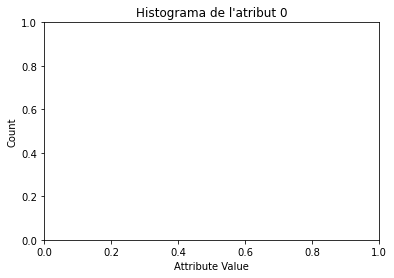

In [506]:
print(x_df)
plt.figure()
plt.title("Histograma de l'atribut 0")
plt.xlabel("Attribute Value")
plt.ylabel("Count")
hist = plt.hist(x_t[:,1], bins=11, range=[np.min(x_t[:,0]), np.max(x_t[:,0])], histtype="bar", rwidth=0.8)

/var/folders/p5/lqmtl3dd4b7_xq65rgrxjh580000gn/T/ipykernel_9007/1831816588.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['age'],1).hist()


array([[<AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'address'}>,
        <AxesSubplot:title={'center':'studytime'}>,
        <AxesSubplot:title={'center':'failures'}>],
       [<AxesSubplot:title={'center':'schoolsup'}>,
        <AxesSubplot:title={'center':'paid'}>,
        <AxesSubplot:title={'center':'activities'}>,
        <AxesSubplot:title={'center':'higher'}>],
       [<AxesSubplot:title={'center':'romantic'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>,
        <AxesSubplot:title={'center':'Walc'}>],
       [<AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'G1'}>,
        <AxesSubplot:title={'center':'G2'}>],
       [<AxesSubplot:title={'center':'G3'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

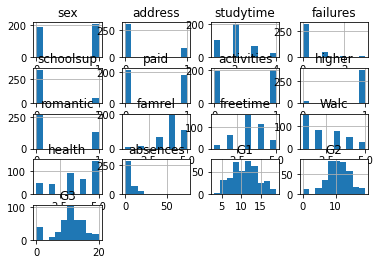

In [507]:
data.drop(['age'],1).hist()

In [511]:
x = x_df.to_numpy()
y =  y_df.to_numpy()

[[1.         0.42857143 0.         ... 0.08       0.125      0.31578947]
 [1.         0.28571429 0.         ... 0.05333333 0.125      0.26315789]
 [1.         0.         0.         ... 0.13333333 0.25       0.42105263]
 ...
 [0.         0.85714286 1.         ... 0.04       0.4375     0.42105263]
 [0.         0.42857143 1.         ... 0.         0.5        0.63157895]
 [0.         0.57142857 0.         ... 0.06666667 0.3125     0.47368421]]
[0.3  0.3  0.5  0.75 0.5  0.75 0.55 0.3  0.95 0.75 0.45 0.6  0.7  0.55
 0.8  0.7  0.7  0.5  0.25 0.5  0.75 0.75 0.8  0.6  0.4  0.4  0.55 0.75
 0.55 0.55 0.6  0.85 0.8  0.6  0.75 0.3  0.9  0.75 0.55 0.65 0.55 0.6
 0.9  0.55 0.45 0.3  0.55 1.   0.7  0.35 0.65 0.65 0.5  0.55 0.65 0.5
 0.75 0.75 0.45 0.8  0.55 0.55 0.45 0.45 0.5  0.75 0.6  0.3  0.4  0.8
 0.75 0.5  0.25 0.7  0.55 0.5  0.5  0.55 0.5  0.25 0.6  0.55 0.3  0.75
 0.5  0.4  0.3  0.7  0.5  0.35 0.4  0.9  0.3  0.5  0.7  0.5  0.75 0.5
 0.7  0.4  0.25 0.85 0.7  0.3  0.9  0.55 0.4  0.9  0.65 0.8  0.

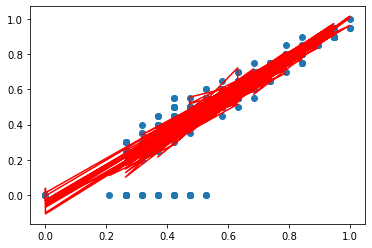

In [524]:
from sklearn.metrics import r2_score


atribut1 = x[:,:].reshape(x.shape[0], 17)
print(x)
print(y)

regr = regression(atribut1, y_df)
predicted = regr.predict(atribut1)

# Mostrem la predicció del model entrenat en color vermell a la Figura anterior 1
plt.figure()
ax = plt.scatter(x[:,16], y)
plt.plot(atribut1[:,16], predicted, 'r')

# Mostrem l'error (MSE i R2)
MSE = mse(y_df, predicted)
r2 = r2_score(y_df, predicted)

print("Mean squeared error: ", MSE)
print("R2 score: ", r2)



